## Implement K-Means Clustering

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.naive_bayes import BernoulliNB
import math
import random

In [2]:
# Load the data, which is included in sklearn.
iris = load_iris()
print 'Iris target names:', iris.target_names
print 'Iris feature names:', iris.feature_names
X, Y = iris.data, iris.target

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Split into train and test.
train_data, train_labels = X[:100], Y[:100]
test_data, test_labels = X[100:], Y[100:]

Iris target names: ['setosa' 'versicolor' 'virginica']
Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The iris feature values are real valued -- measurements in centimeters. Let's look at histograms of each feature.

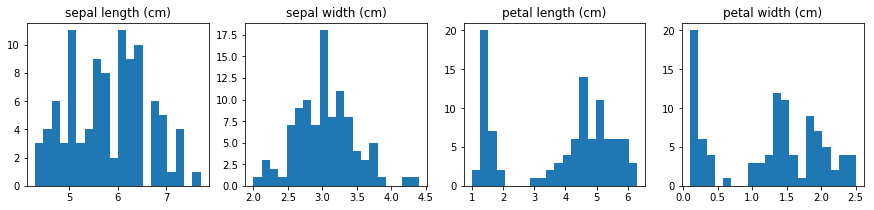

In [3]:
# Create a new figure and set the figsize argument so we get square-ish plots of the 4 features.
plt.figure(figsize=(15, 3))

# Iterate over the features, creating a subplot with a histogram for each one.
for feature in range(train_data.shape[1]):
    plt.subplot(1, 4, feature+1)
    plt.hist(train_data[:,feature], 20)
    plt.title(iris.feature_names[feature])

Recall that Naive Bayes assumes conditional independence of features. With $Y$ the set of labels and $X$ the set of features ($y$ is a specific label and $x$ is a specific feature), Naive Bayes gives the probability of a label $y$ given input features $X$ as:

$ \displaystyle P(y|X) \approx 
  \frac { P(y) \prod_{x \in X} P(x|y) }
        { \sum_{y \in Y} P(y) \prod_{x \in X} P(x|y) }
$

Let's estimate some of these probabilities using maximum likelihood, which is just a matter of counting and normalizing. We'll start with the prior probability of the label $P(y)$.

(150, 4)


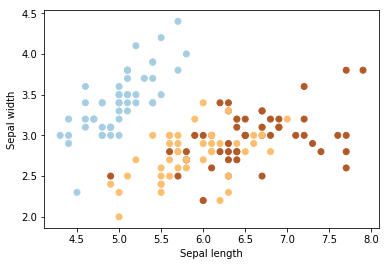

In [22]:
# X[:, 0]: sepal length
# X[:, 1]: sepal width
def visualizeIris(classes):
    plt.scatter(X[:, 0], X[:, 1], c=classes, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()
    
visualizeIris(Y)

assignClusters: length = 3, [[6.1425877497074612, 3.8350241500343927, 5.6554269629602008, 0.14293056400206305], [4.4605054104525257, 2.3361390751637159, 2.1645232064047226, 1.5861409925686925], [4.4939868311689288, 3.4737282473571427, 3.9274015851829831, 1.4758837786340879]]
1 1


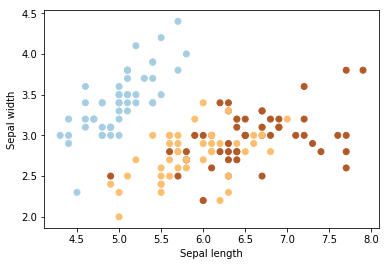

updateCentroids: length = 3, [[6.1425877497074612, 3.8350241500343927, 5.6554269629602008, 0.14293056400206305], [4.4605054104525257, 2.3361390751637159, 2.1645232064047226, 1.5861409925686925], [4.4939868311689288, 3.4737282473571427, 3.9274015851829831, 1.4758837786340879]]
assignClusters: length = 0, []
2 1


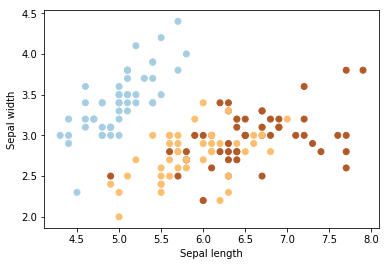

assignClusters: length = 3, [[6.6832614911488673, 2.3254723449702732, 4.3706058671695569, 2.0481271433738351], [6.8090833916904669, 2.6585096212378545, 1.5848250652648153, 1.9821638064513869], [6.5353082470497519, 4.2328823740846486, 3.4854599505568609, 2.0816060008136708]]
3 1


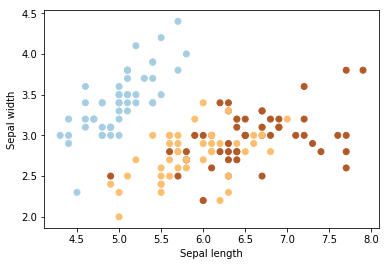

updateCentroids: length = 3, [[6.6832614911488673, 2.3254723449702732, 4.3706058671695569, 2.0481271433738351], [6.8090833916904669, 2.6585096212378545, 1.5848250652648153, 1.9821638064513869], [6.5353082470497519, 4.2328823740846486, 3.4854599505568609, 2.0816060008136708]]
assignClusters: length = 0, []
4 1


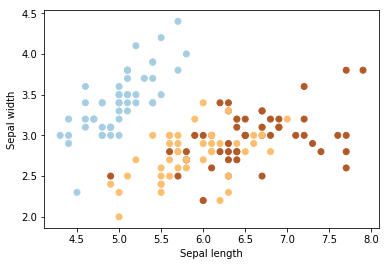

assignClusters: length = 3, [[7.6548744138604139, 3.8021547474196717, 6.1677390391215443, 0.45466931447552816], [6.0450677220584943, 2.0486760289744135, 5.9133819320271179, 1.2935850929220021], [6.8676656575592911, 2.0549139351890293, 5.6665824444471466, 1.4813365368027094]]
5 1


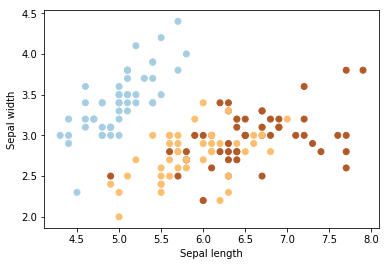

updateCentroids: length = 3, [[7.6548744138604139, 3.8021547474196717, 6.1677390391215443, 0.45466931447552816], [6.0450677220584943, 2.0486760289744135, 5.9133819320271179, 1.2935850929220021], [6.8676656575592911, 2.0549139351890293, 5.6665824444471466, 1.4813365368027094]]
assignClusters: length = 0, []
6 1


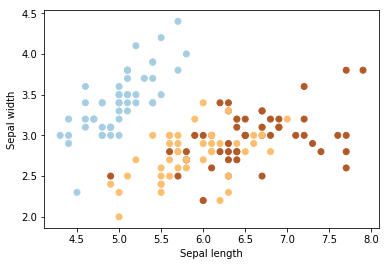

assignClusters: length = 3, [[7.1833346287047988, 2.9631640852390078, 4.6860548222384075, 2.4857885116804734], [5.759938964384145, 4.025149465103901, 1.0164767083340398, 1.199698903058614], [4.6696728759055102, 2.417618756690421, 4.9500234452157246, 0.52392750221456952]]
7 1


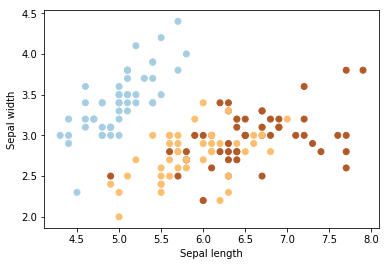

updateCentroids: length = 3, [[7.1833346287047988, 2.9631640852390078, 4.6860548222384075, 2.4857885116804734], [5.759938964384145, 4.025149465103901, 1.0164767083340398, 1.199698903058614], [4.6696728759055102, 2.417618756690421, 4.9500234452157246, 0.52392750221456952]]
assignClusters: length = 0, []
8 1


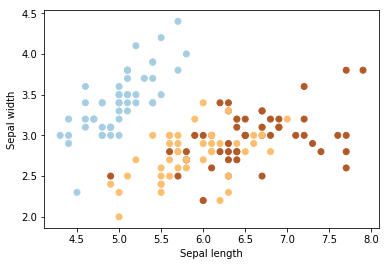

assignClusters: length = 3, [[5.256726461377184, 2.8669146763624744, 2.7642815710949518, 2.2358615174345493], [4.6556557434181842, 3.9683355556158917, 1.8786258876976376, 1.1375281665686583], [6.8485361244865235, 2.2172583620211768, 2.5792364217566153, 0.29640173902922407]]
9 1


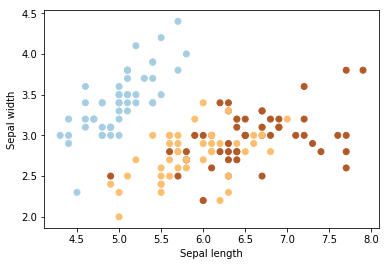

updateCentroids: length = 3, [[5.256726461377184, 2.8669146763624744, 2.7642815710949518, 2.2358615174345493], [4.6556557434181842, 3.9683355556158917, 1.8786258876976376, 1.1375281665686583], [6.8485361244865235, 2.2172583620211768, 2.5792364217566153, 0.29640173902922407]]
assignClusters: length = 0, []
10 1


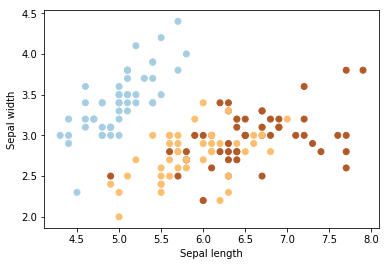

assignClusters: length = 3, [[5.1156355085510707, 3.6412760085589513, 4.0531755110176118, 0.25319289060409966], [7.3032039266865709, 3.7109168978348577, 4.3526762958063276, 2.1800852843036154], [7.3912078283092306, 3.0361587761373694, 1.4139641522933146, 0.98774242147799818]]
11 1


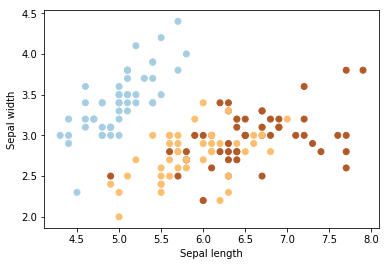

updateCentroids: length = 3, [[5.1156355085510707, 3.6412760085589513, 4.0531755110176118, 0.25319289060409966], [7.3032039266865709, 3.7109168978348577, 4.3526762958063276, 2.1800852843036154], [7.3912078283092306, 3.0361587761373694, 1.4139641522933146, 0.98774242147799818]]
assignClusters: length = 0, []
12 1


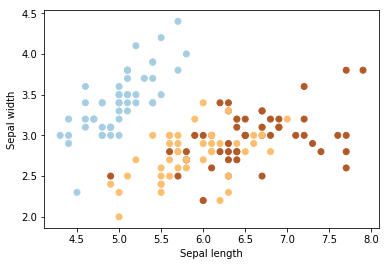

assignClusters: length = 3, [[4.7694387933459659, 3.9097446749297786, 4.5915958256093585, 1.4176857771360147], [6.6625003088414001, 2.4050869488120048, 5.7855459930470303, 0.16516927860365477], [4.3985498553290494, 3.9947646766086677, 4.8271048600079851, 0.90484669418427921]]
13 1


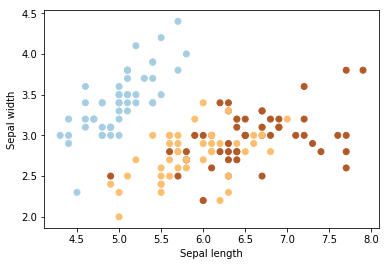

updateCentroids: length = 3, [[4.7694387933459659, 3.9097446749297786, 4.5915958256093585, 1.4176857771360147], [6.6625003088414001, 2.4050869488120048, 5.7855459930470303, 0.16516927860365477], [4.3985498553290494, 3.9947646766086677, 4.8271048600079851, 0.90484669418427921]]
assignClusters: length = 0, []
14 1


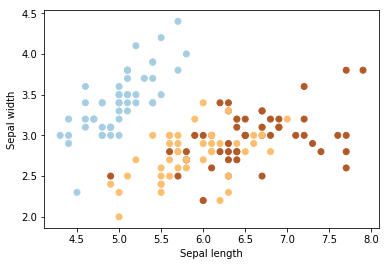

assignClusters: length = 3, [[6.4212631917523915, 3.7967995924726941, 3.4805613512968527, 1.1772945767324867], [4.9132783673345051, 3.2559841263279719, 3.5513653156481926, 1.2181868284512856], [6.3610946671254318, 4.0688280054323469, 1.1340849862109617, 2.3182682933123266]]
15 1


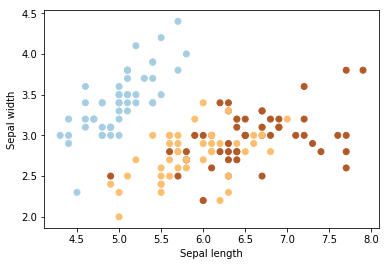

updateCentroids: length = 3, [[6.4212631917523915, 3.7967995924726941, 3.4805613512968527, 1.1772945767324867], [4.9132783673345051, 3.2559841263279719, 3.5513653156481926, 1.2181868284512856], [6.3610946671254318, 4.0688280054323469, 1.1340849862109617, 2.3182682933123266]]
assignClusters: length = 0, []
16 1


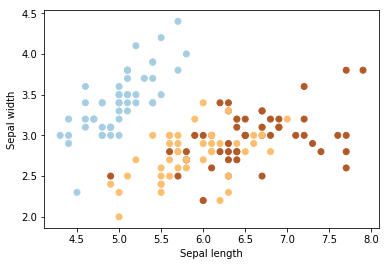

assignClusters: length = 3, [[7.1529749788119563, 2.5594563126359828, 3.4815621723283603, 1.0490941271127898], [5.8462972825292372, 2.6862865454172682, 2.6554742046433017, 1.2629025343814719], [4.7698309828390606, 2.604192858825555, 1.3224349251050551, 0.18987468322753234]]
17 1


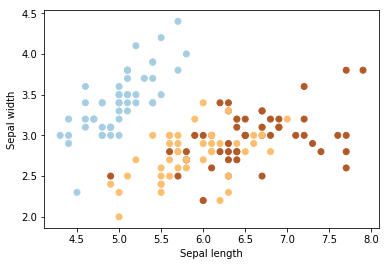

updateCentroids: length = 3, [[7.1529749788119563, 2.5594563126359828, 3.4815621723283603, 1.0490941271127898], [5.8462972825292372, 2.6862865454172682, 2.6554742046433017, 1.2629025343814719], [4.7698309828390606, 2.604192858825555, 1.3224349251050551, 0.18987468322753234]]
assignClusters: length = 0, []
18 1


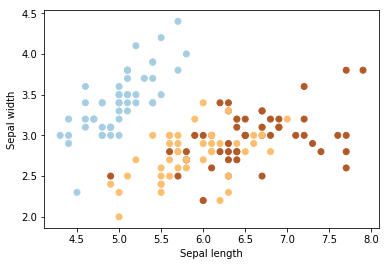

assignClusters: length = 3, [[5.5494833324896202, 4.2708215112701886, 3.7051636324549819, 0.62814670071254641], [7.546754879376298, 3.2259164393494508, 1.4096318031347137, 0.73780893682255166], [4.6096316083157891, 3.1347063672558098, 4.4510650747793443, 0.2924974362029914]]
19 1


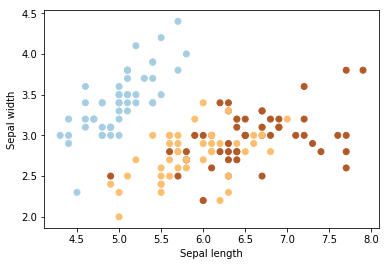

updateCentroids: length = 3, [[5.5494833324896202, 4.2708215112701886, 3.7051636324549819, 0.62814670071254641], [7.546754879376298, 3.2259164393494508, 1.4096318031347137, 0.73780893682255166], [4.6096316083157891, 3.1347063672558098, 4.4510650747793443, 0.2924974362029914]]
assignClusters: length = 0, []
20 1


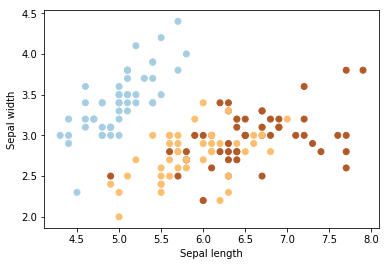

assignClusters: length = 3, [[7.10459912293976, 3.744153536793271, 2.4134047444680684, 0.11159121125184575], [6.5961446381423503, 3.0652271670103035, 3.6382457380322943, 1.2650196033601395], [6.700214494760381, 3.5282195864326962, 2.072284802140691, 0.29361694129407023]]
21 1


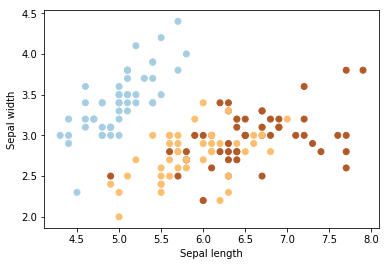

updateCentroids: length = 3, [[7.10459912293976, 3.744153536793271, 2.4134047444680684, 0.11159121125184575], [6.5961446381423503, 3.0652271670103035, 3.6382457380322943, 1.2650196033601395], [6.700214494760381, 3.5282195864326962, 2.072284802140691, 0.29361694129407023]]
assignClusters: length = 0, []
22 1


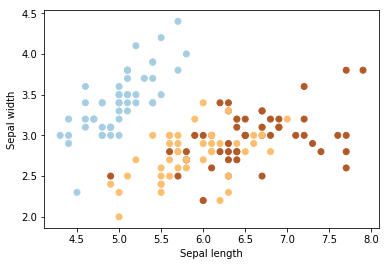

assignClusters: length = 3, [[6.2006773180390287, 3.9285456670618935, 3.0117285889677947, 1.6282287325356963], [5.5370297089419154, 3.4462437427124106, 1.9431880199800231, 2.222033824344726], [5.6430713349427357, 3.9740466710898099, 3.721187069057851, 2.1169847008477567]]
23 1


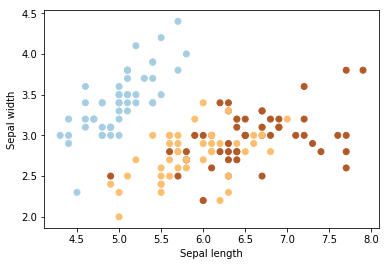

updateCentroids: length = 3, [[6.2006773180390287, 3.9285456670618935, 3.0117285889677947, 1.6282287325356963], [5.5370297089419154, 3.4462437427124106, 1.9431880199800231, 2.222033824344726], [5.6430713349427357, 3.9740466710898099, 3.721187069057851, 2.1169847008477567]]
assignClusters: length = 0, []
24 1


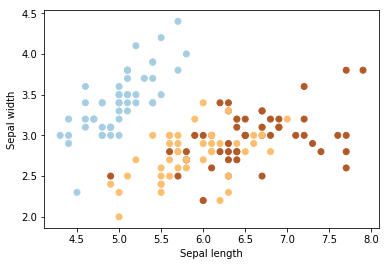

assignClusters: length = 3, [[5.144393573450933, 4.0996090161976451, 4.5952540004460793, 2.3846775124252], [4.9031149399879732, 2.4144523785539764, 1.194011411434841, 0.85387607275724964], [7.4987539916100401, 3.02379610313338, 5.8724957161125193, 1.3387237320156355]]
25 1


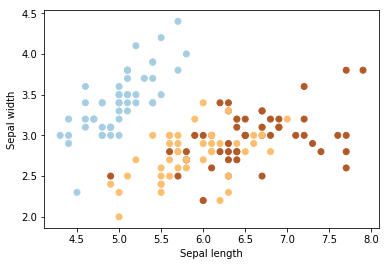

updateCentroids: length = 3, [[5.144393573450933, 4.0996090161976451, 4.5952540004460793, 2.3846775124252], [4.9031149399879732, 2.4144523785539764, 1.194011411434841, 0.85387607275724964], [7.4987539916100401, 3.02379610313338, 5.8724957161125193, 1.3387237320156355]]
assignClusters: length = 0, []
26 1


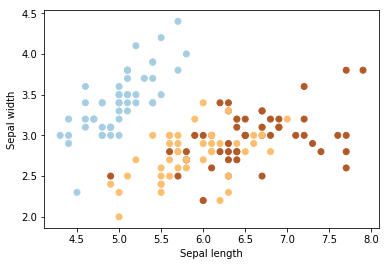

assignClusters: length = 3, [[4.9011719519528638, 3.7957822140850492, 5.5407640281299697, 2.0506582632280437], [6.6490670770824298, 3.5154096165259738, 1.5132908164140584, 0.61453123307571256], [5.4950289230545213, 3.0387610337943562, 3.0741269179514892, 1.2834028466510616]]
27 1


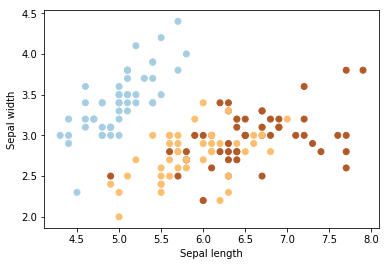

updateCentroids: length = 3, [[4.9011719519528638, 3.7957822140850492, 5.5407640281299697, 2.0506582632280437], [6.6490670770824298, 3.5154096165259738, 1.5132908164140584, 0.61453123307571256], [5.4950289230545213, 3.0387610337943562, 3.0741269179514892, 1.2834028466510616]]
assignClusters: length = 0, []
28 1


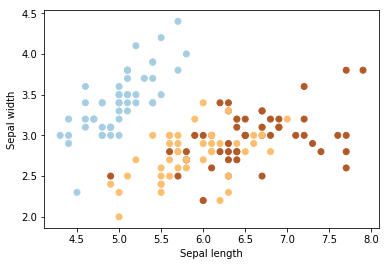

assignClusters: length = 3, [[6.0181702479570243, 3.3707861309357559, 5.1223564238089354, 2.0788292265251993], [7.5734476996519806, 3.4795059345499455, 5.0168517362083112, 0.96953842436602389], [7.4130545577750429, 3.4097164620666156, 1.005489656276183, 0.14182975692218544]]
29 1


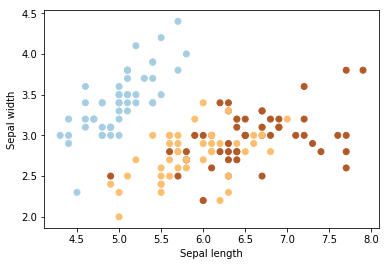

updateCentroids: length = 3, [[6.0181702479570243, 3.3707861309357559, 5.1223564238089354, 2.0788292265251993], [7.5734476996519806, 3.4795059345499455, 5.0168517362083112, 0.96953842436602389], [7.4130545577750429, 3.4097164620666156, 1.005489656276183, 0.14182975692218544]]
assignClusters: length = 0, []
30 1


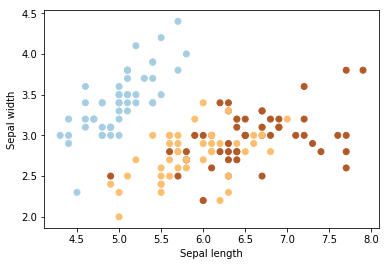

assignClusters: length = 3, [[6.6957280858537267, 2.0224265597193996, 1.4125908215199101, 1.0476227622133329], [7.5646075962620145, 2.2752960709419803, 4.0115437550193604, 0.17255552939048491], [7.5049393191544622, 3.1686705981011474, 2.4914289026014824, 2.0006346716238563]]
31 1


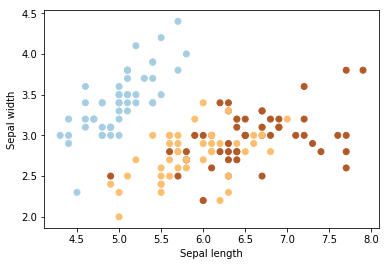

updateCentroids: length = 3, [[6.6957280858537267, 2.0224265597193996, 1.4125908215199101, 1.0476227622133329], [7.5646075962620145, 2.2752960709419803, 4.0115437550193604, 0.17255552939048491], [7.5049393191544622, 3.1686705981011474, 2.4914289026014824, 2.0006346716238563]]
assignClusters: length = 0, []
32 1


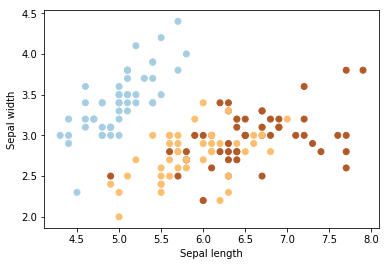

assignClusters: length = 3, [[5.7910185786168178, 3.0300857142905886, 1.2555090743946229, 1.0516720710766321], [7.0981565443810712, 3.3611517729980731, 1.8333193106902939, 1.2472109781708767], [4.6313723733551493, 2.8261961399604152, 5.1583602294745399, 2.2241158273156039]]
33 1


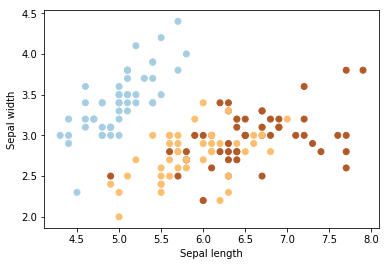

updateCentroids: length = 3, [[5.7910185786168178, 3.0300857142905886, 1.2555090743946229, 1.0516720710766321], [7.0981565443810712, 3.3611517729980731, 1.8333193106902939, 1.2472109781708767], [4.6313723733551493, 2.8261961399604152, 5.1583602294745399, 2.2241158273156039]]
assignClusters: length = 0, []
34 1


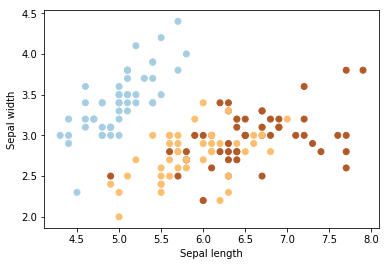

assignClusters: length = 3, [[6.6067201138960563, 4.3574117858865105, 4.9197594387043928, 1.0389480182645121], [7.6624464922233404, 3.705052050869178, 5.8415966230334684, 0.25971546283923186], [6.6718143178802221, 3.7252705884461133, 2.702838711150386, 1.5065065413090135]]
35 1


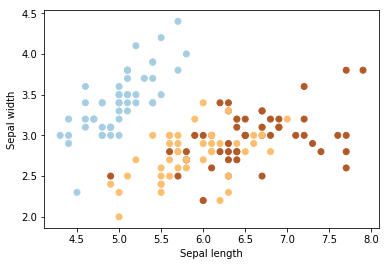

updateCentroids: length = 3, [[6.6067201138960563, 4.3574117858865105, 4.9197594387043928, 1.0389480182645121], [7.6624464922233404, 3.705052050869178, 5.8415966230334684, 0.25971546283923186], [6.6718143178802221, 3.7252705884461133, 2.702838711150386, 1.5065065413090135]]
assignClusters: length = 0, []
36 1


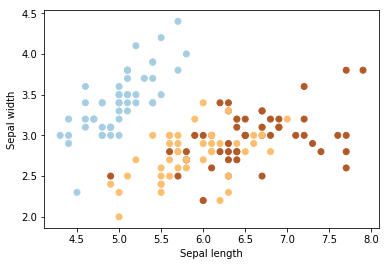

assignClusters: length = 3, [[5.9991768997418919, 3.8091778370268696, 2.8855926776078098, 0.47571650591819259], [4.7143502891555382, 2.1189146509390917, 3.5888548007807226, 2.3318735131905695], [5.8178935827855698, 3.7763165186695073, 1.3316772471325116, 0.5541856062055408]]
37 1


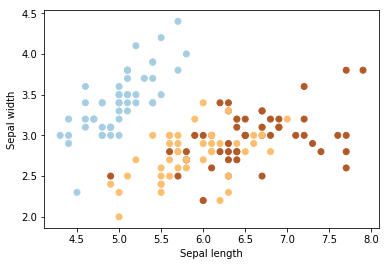

updateCentroids: length = 3, [[5.9991768997418919, 3.8091778370268696, 2.8855926776078098, 0.47571650591819259], [4.7143502891555382, 2.1189146509390917, 3.5888548007807226, 2.3318735131905695], [5.8178935827855698, 3.7763165186695073, 1.3316772471325116, 0.5541856062055408]]
assignClusters: length = 0, []
38 1


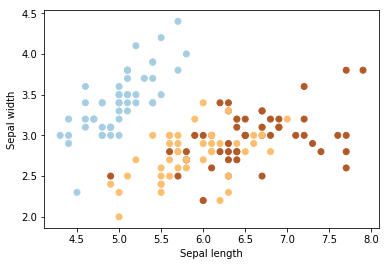

assignClusters: length = 3, [[4.4351568953955285, 3.1516655388885795, 3.3662287964067374, 1.3402247497690194], [4.6949765598278033, 3.6483219066815868, 5.7349864699134452, 1.7388066218309803], [5.0272950050111813, 3.0218010741643453, 4.9896085848023457, 0.47526437890006268]]
39 1


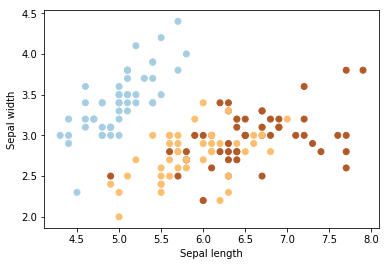

updateCentroids: length = 3, [[4.4351568953955285, 3.1516655388885795, 3.3662287964067374, 1.3402247497690194], [4.6949765598278033, 3.6483219066815868, 5.7349864699134452, 1.7388066218309803], [5.0272950050111813, 3.0218010741643453, 4.9896085848023457, 0.47526437890006268]]
assignClusters: length = 0, []
40 1


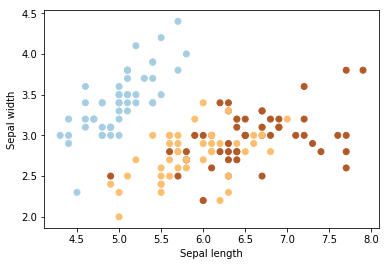

assignClusters: length = 3, [[6.138295107492965, 2.266748357656287, 1.3820312582757686, 1.1975830315082261], [6.1297481819543895, 3.0256424596397791, 5.6476111209646334, 1.5577288656562418], [6.6477036641334095, 3.4926218264194189, 1.9580796512965444, 0.46116784631282681]]
41 1


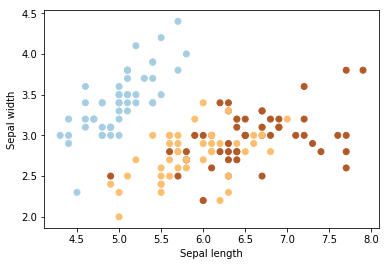

updateCentroids: length = 3, [[6.138295107492965, 2.266748357656287, 1.3820312582757686, 1.1975830315082261], [6.1297481819543895, 3.0256424596397791, 5.6476111209646334, 1.5577288656562418], [6.6477036641334095, 3.4926218264194189, 1.9580796512965444, 0.46116784631282681]]
assignClusters: length = 0, []
42 1


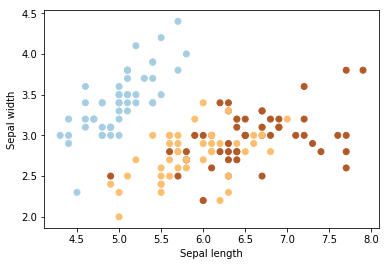

assignClusters: length = 3, [[4.4602710528558553, 2.2780065046701479, 4.7532688465468649, 1.6996938421761738], [7.3572638042334555, 4.1378152797054746, 5.3288406661547967, 0.81884347790964451], [7.2254760014922699, 2.4662010542693396, 4.4926589752407002, 2.1212862998562581]]
43 1


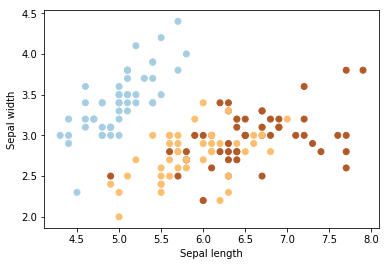

updateCentroids: length = 3, [[4.4602710528558553, 2.2780065046701479, 4.7532688465468649, 1.6996938421761738], [7.3572638042334555, 4.1378152797054746, 5.3288406661547967, 0.81884347790964451], [7.2254760014922699, 2.4662010542693396, 4.4926589752407002, 2.1212862998562581]]
assignClusters: length = 0, []
44 1


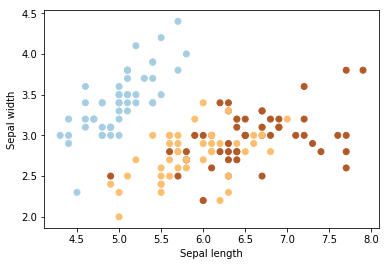

assignClusters: length = 3, [[5.9251078492240055, 3.9792305503818985, 4.3793388697936848, 0.92116265808423492], [6.9990048176169362, 2.6402131060731691, 1.9813080017837956, 1.7190916692220974], [4.9685832866624269, 4.3943632558258248, 1.7023849968439944, 0.53180881374317168]]
45 1


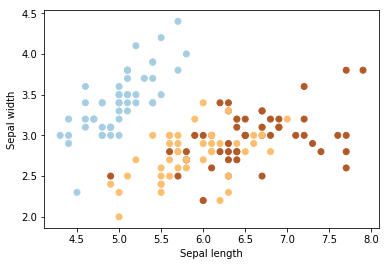

updateCentroids: length = 3, [[5.9251078492240055, 3.9792305503818985, 4.3793388697936848, 0.92116265808423492], [6.9990048176169362, 2.6402131060731691, 1.9813080017837956, 1.7190916692220974], [4.9685832866624269, 4.3943632558258248, 1.7023849968439944, 0.53180881374317168]]
assignClusters: length = 0, []
46 1


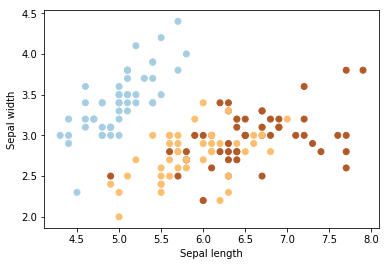

assignClusters: length = 3, [[6.3445663049640366, 3.3013013366286943, 2.4950510131601518, 0.63314150184967077], [6.9269607459467704, 2.4931221587628514, 3.8446225451258886, 0.76491973962098858], [5.4213319319910127, 4.1980839008735984, 4.6392817719594523, 1.9097853410162353]]
47 1


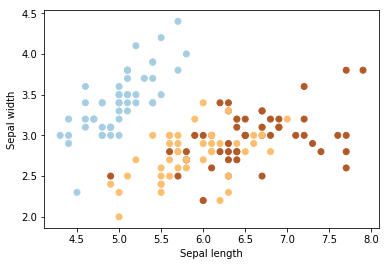

updateCentroids: length = 3, [[6.3445663049640366, 3.3013013366286943, 2.4950510131601518, 0.63314150184967077], [6.9269607459467704, 2.4931221587628514, 3.8446225451258886, 0.76491973962098858], [5.4213319319910127, 4.1980839008735984, 4.6392817719594523, 1.9097853410162353]]
assignClusters: length = 0, []
48 1


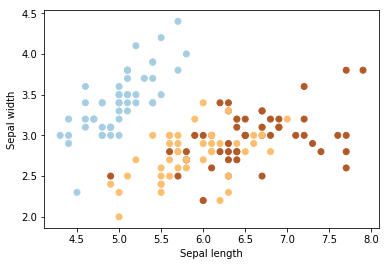

assignClusters: length = 3, [[5.9108961242831679, 2.5054198887547248, 4.1851010453557969, 0.55424722534076365], [5.2256885466418321, 2.8302383361021564, 5.8255604777998338, 0.13208201322793495], [6.5383449191430971, 3.606362775150699, 4.9249006364526871, 1.2271798908035159]]
49 1


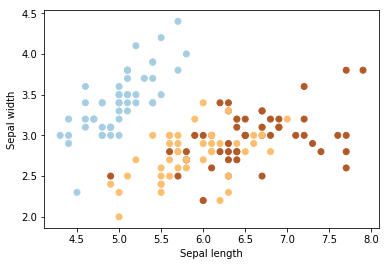

In [27]:
# Verbose implementation of K-means to practice with

# (5) how can we choose this? 
# (6) how can we evaluate this?
def k():
    return 3  

# how else could this be done?
def createRandomExample():
    new = []
    for feature in range(train_data.shape[1]):
        new.append(random.uniform(min(train_data[:,feature]), max(train_data[:,feature])))
    #print("createRandomExample = %s" % new)
    return new  
    
def initCentroids(k):
    centroids=[]
    for i in range(0,k):
          centroids.append(createRandomExample())
    return centroids
            
def updateCentroids(centroids):
    if len(centroids) == 0:
        return initCentroids(k)
    else:
    # (1) fill in
        print("updateCentroids: length = %s, %s" % (len(centroids), centroids))
        return []
    
def assignClusters(centroids):
    # (2) fill in
    print("assignClusters: length = %s, %s" % (len(centroids), centroids))

    return Y #1
    
def cost(centroids):
    # (3) fill in
    return 1
    
def distance(p1, p2):  
    sqdist = 0.
    for i in range(0,3):
        sqdist += (p1[i] - p2[i]) ** 2
    return sqdist ** .5 

k = k()
centroids = []
classes = []
for i in range(1,50): # (7) how else could we chose to stop?
    centroids = updateCentroids(centroids)
    classes = assignClusters(centroids) 
    # (4) uncomment 
    print i, cost(centroids)
    visualizeIris(classes)